# Student Performance Analysis

**Overview:** The datasets consist of two related sets of data collected from two Portuguese schools, focusing on student achievement in Mathematics and Portuguese language. They provide comprehensive insights into various factors that might influence student performance.

**Background:** The data comprises grades and a range of demographic, social, and school-related features, sourced from school reports and questionnaires. The aim is to understand and possibly predict student success in different academic periods.

**Data Details:**

* School: The school that the student attends.
* Sex: The gender of the student.
* Age: The age of the student.
* Address: The type of area the student lives in (urban or rural).
* Medu & Fedu: The education level of the mother and father.
* Studytime: The weekly study time of the student.
* Failures: The number of past class failures.
* G1, G2, G3: Grades for the first, second, and final periods, respectively, with G3 being the final grade and highly correlated with G1 and G2.

## Data Exploration

In [1]:
# First, I need to load the datasets to explore their content.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the datasets
mat_data = pd.read_csv(r'C:\Users\Haajar\OneDrive\Data Vault\03 ProdSphere\student-performance-analysis\datasets\student-mat.csv', sep=';')
por_data = pd.read_csv(r'C:\Users\Haajar\OneDrive\Data Vault\03 ProdSphere\student-performance-analysis\datasets\student-por.csv', sep=';')

# Displaying the first few rows of each dataset for an initial overview
mat_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
por_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
mat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
por_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

### Dataset Overview

* **Datasets:** The `student-mat.csv` and `student-por.csv` contain student achievement data in **Mathematics (Mat)** and **Portuguese language (Por)**, respectively.
* **Data Source:** The data is gathered from two Portuguese schools and includes both academic and personal information of students.

* **Record Attributes:**
  * **Demographic Information** Includes age, sex, etc.
  * **School-Related Features** Covers study time, failures, etc.
  * **Social Aspects** Encompasses family size, parent's job, etc.
  * **Academic Grades** G1, G2, and G3, where G3 is the final year grade, and G1 and G2 are the grades from the 1st and 2nd periods.

In [6]:
mat_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
por_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


### Summary Statistics:

Let's compute the summary statistics for both datasets to understand their distribution, central tendency, and variability. This includes measures like mean, median, standard deviation, and range for numerical columns.

**(Mat) Dataset:**

* **Age:** Students are between 15 and 22 years old, with an average age of about 16.7.
* **Study Time:** On average, students spend about 2 hours per week studying, with a standard deviation of 0.84 hours.
* **Academic Failures:** The average number of failures is 0.33.
* **Grades (G1, G2, G3):** The average grades for the 1st, 2nd, and final period (G1, G2, G3) hover around 10.9, 10.7, and 10.4, respectively.

**(Por) Dataset:**

* **Age:** Similar age distribution, with an average of approximately 16.7 years.
* **Study Time:** Average study time is slightly less than in the Mat dataset, at about 1.9 hours per week.
* **Academic Failures:** Lower average failures at 0.22.
* **Grades (G1, G2, G3):** The average grades are slightly higher than in the Mat dataset, with G1, G2, and G3 averaging around 11.4, 11.6, and 11.9, respectively.

Both datasets show a typical distribution for a student population, with grades reflecting a normal academic performance range. The next step will be to visualize this data for more insights.

## Data Visualization

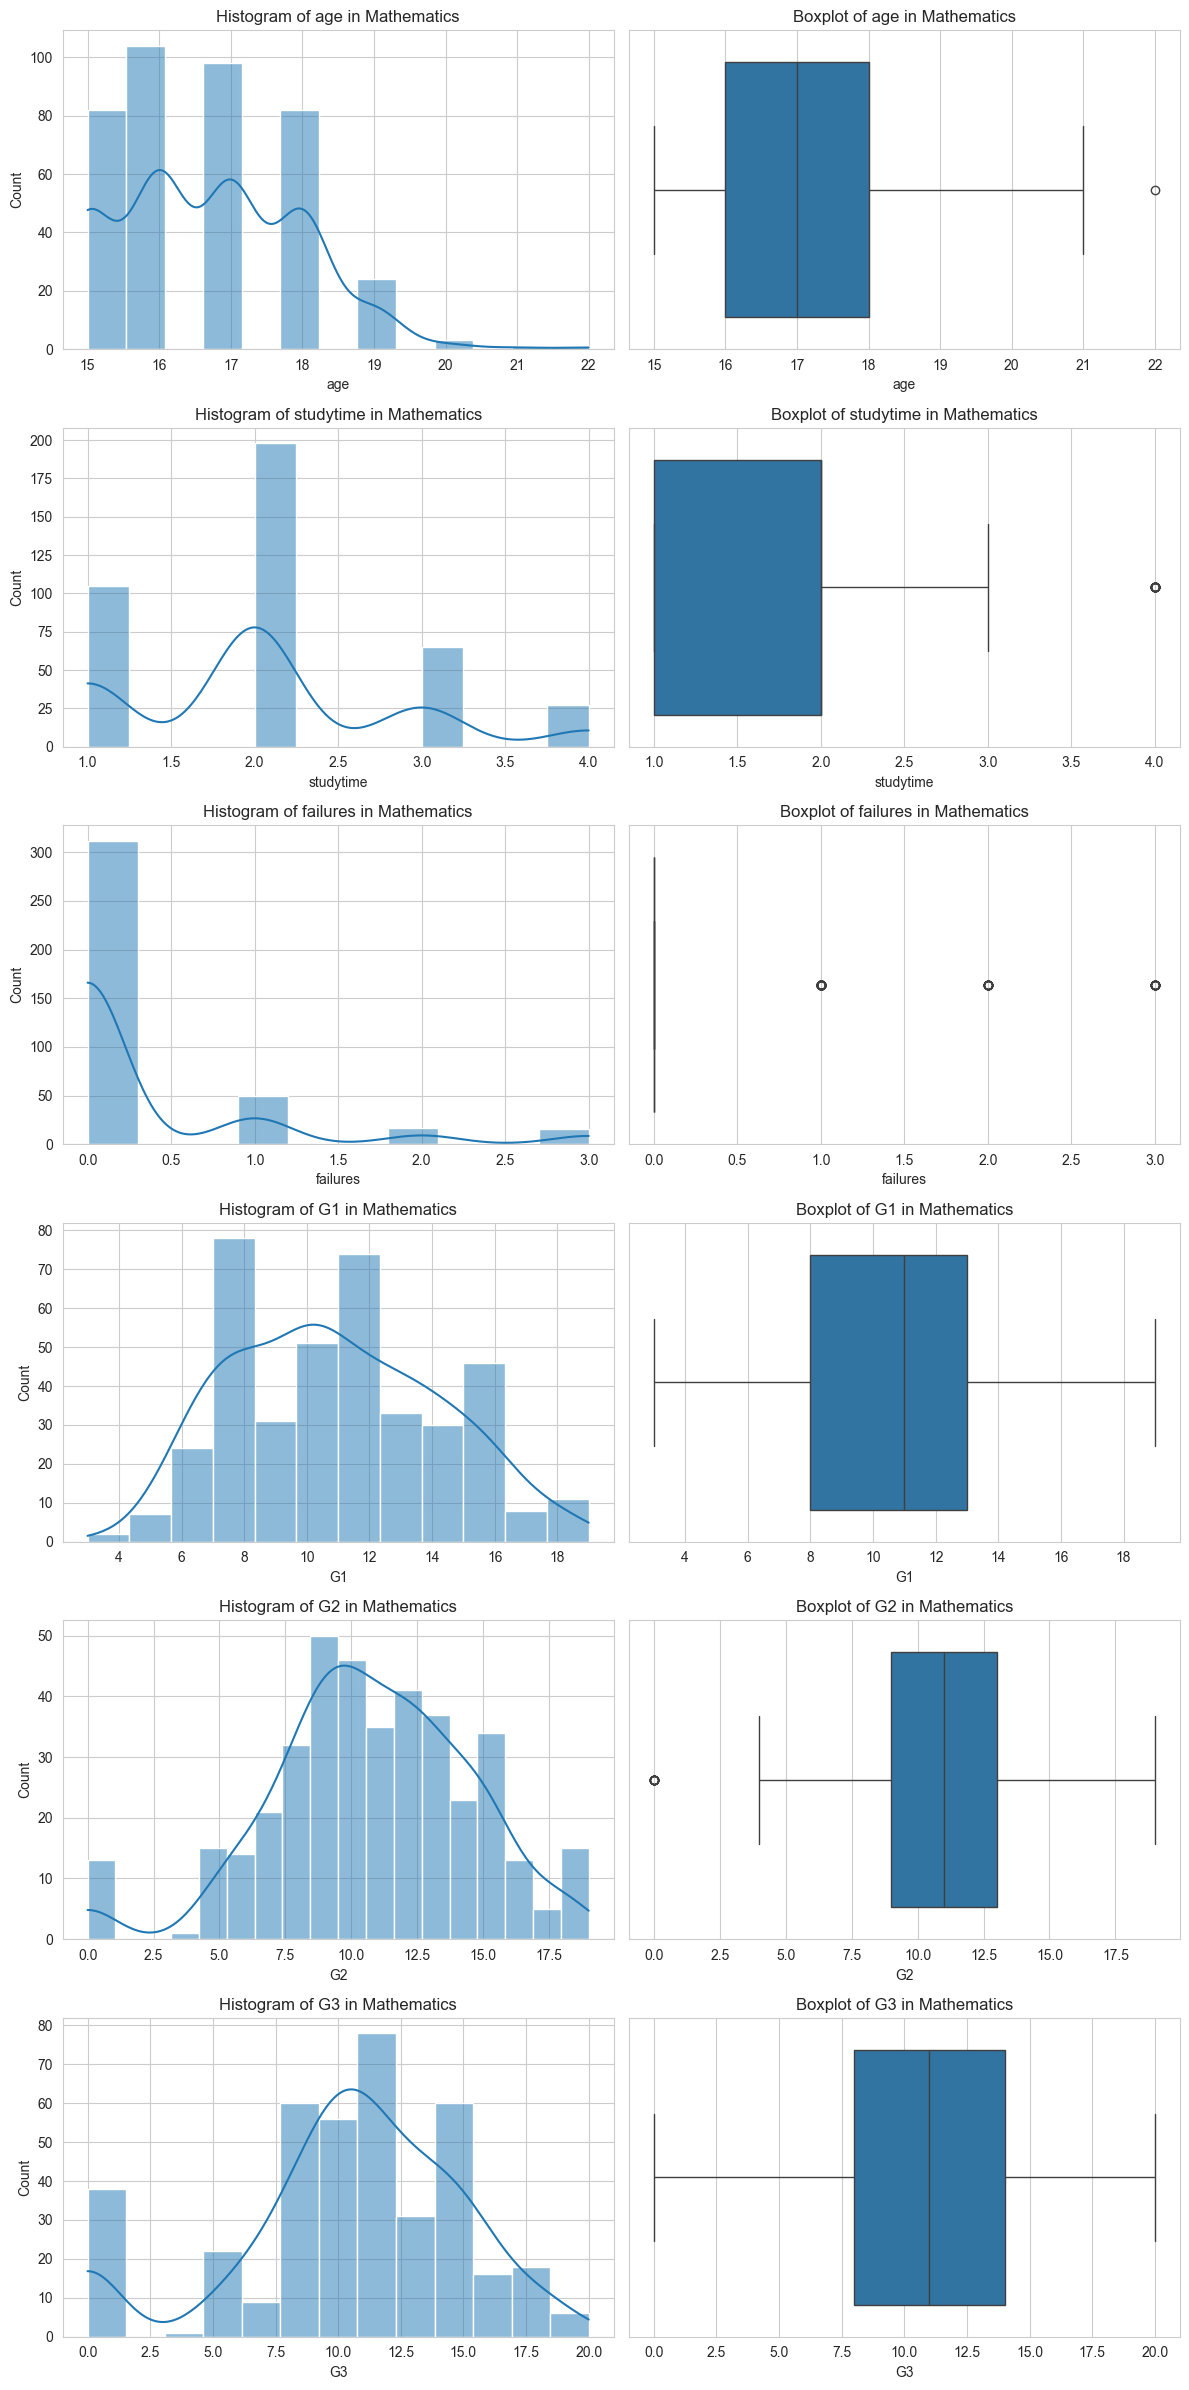

In [8]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Defining a function to create histograms and boxplots for specified columns
def plot_histograms_boxplots(data, columns, dataset_name):
    fig, axes = plt.subplots(len(columns), 2, figsize=(12, 4 * len(columns)))
    for i, col in enumerate(columns):
        # Histogram
        sns.histplot(data[col], kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Histogram of {col} in {dataset_name}')
        # Boxplot
        sns.boxplot(x=data[col], ax=axes[i, 1])
        axes[i, 1].set_title(f'Boxplot of {col} in {dataset_name}')
    plt.tight_layout()

# Columns of interest for both datasets
columns_of_interest = ['age', 'studytime', 'failures', 'G1', 'G2', 'G3']

# Plotting for Mathematics dataset
plot_histograms_boxplots(mat_data, columns_of_interest, 'Mathematics')

#### Mathematics Insights
The visualizations provide a deeper understanding of the data distribution:

* **Age:** Most students are between 15-18 years old, with a few older students.
* **Study Time:** A large number of students study for 1-2 hours per week.
* **Failures:** Most students have no failures, with a few having one or more.
* **Grades (G1, G2, G3):** The grades are normally distributed, with some outliers, particularly in G2 and G3.

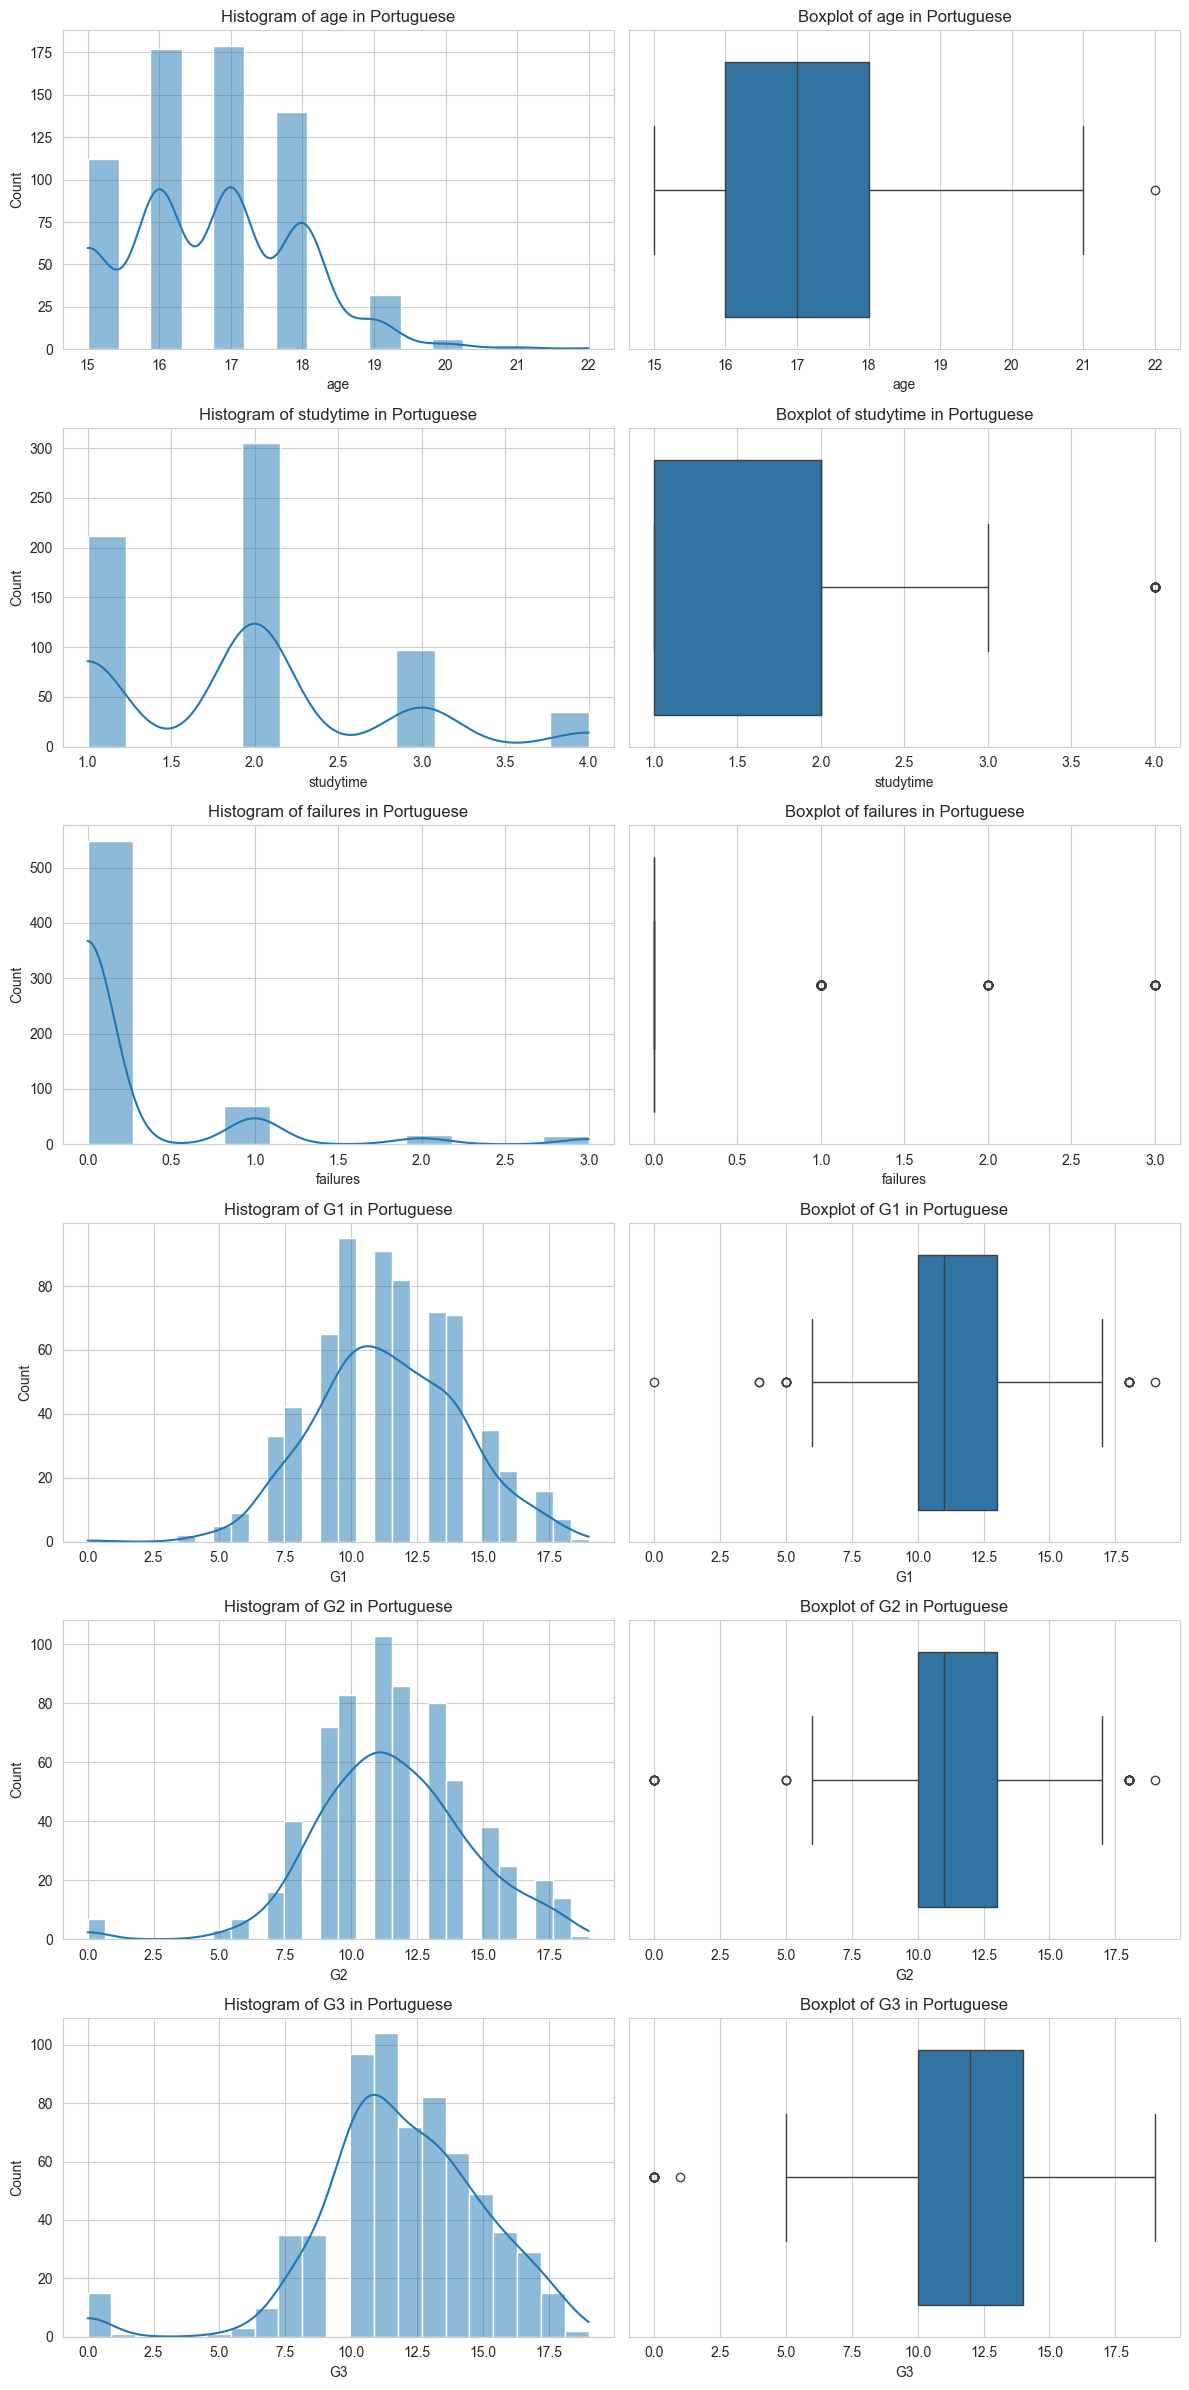

In [9]:
# Plotting for Portuguese dataset
plot_histograms_boxplots(por_data, columns_of_interest, 'Portuguese')

#### Portuguese Language Insights
The visualizations provide insights into the data distribution for the Portuguese Language dataset:

* **Age:** Similar age distribution to the Mathematics dataset.
* **Study Time:** The distribution is similar to the Mathematics dataset but slightly skewed towards lower study times.
* **Failures:** Very few failures, similar to the Mathematics dataset.
* **Grades (G1, G2, G3):** Grades are slightly higher and more evenly distributed compared to the Mathematics dataset.

## Chi-Square Test for the Portuguese Language Dataset

### Application

In [10]:
from scipy.stats import chi2_contingency

# Defining a function to perform the Chi-Square Test and interpret results
def perform_chi_square_test(data, col1, col2):
    # Creating a contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])

    # Performing the Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Interpreting the result
    significant = p < 0.05  # 5% significance level
    return chi2, p, significant

# Aspects to test
aspects_to_test = {
    'Gender and Academic Performance': ('sex', 'G3'),
    'Internet Access and Grades': ('internet', 'G3'),
    'Family Educational Background and Performance': ('Medu', 'G3')
}

# Performing the tests for Mathematics dataset

por_chi_square_results = {aspect: perform_chi_square_test(por_data, *columns) for aspect, columns in aspects_to_test.items()}

por_chi_square_results

{'Gender and Academic Performance': (21.910210365202236,
  0.14611445184701047,
  False),
 'Internet Access and Grades': (24.474147027291785,
  0.07964798902533757,
  False),
 'Family Educational Background and Performance': (116.85186784971884,
  6.147265010886306e-05,
  True)}

### Results

* **Gender and Academic Performance:** The Chi-Square value is 21.91 with a p-value of 0.15, showing no significant association between gender and performance.
* **Internet Access and Grades:** The Chi-Square value is 24.47 with a p-value of 0.08, again indicating no significant impact of internet access on grades.
* **Family Educational Background and Performance:** The Chi-Square value is 116.85 with a p-value close to 0. This result suggests a significant association between the parents' educational level and student performance in Portuguese language.
  
These results indicate that for the Portuguese dataset, the educational background of the family is the only factor among the tested ones that significantly affects student performance.

## Chi-Square Test for the Math Language

### Application

In [11]:
# Additional aspects to test in the Mathematics dataset
additional_aspects_to_test = {
    'School Support and Academic Performance': ('schoolsup', 'G3'),
    'Family Support and Grades': ('famsup', 'G3'),
    'Extra-Curricular Activities and Performance': ('activities', 'G3'),
    'Romantic Relationships and Academic Performance': ('romantic', 'G3'),
    'Health Status and Grades': ('health', 'G3')
}

# Performing the additional tests for Mathematics dataset
additional_mat_chi_square_results = {aspect: perform_chi_square_test(mat_data, *columns) for aspect, columns in additional_aspects_to_test.items()}

additional_mat_chi_square_results

{'School Support and Academic Performance': (32.51747698036442,
  0.012967250942184287,
  True),
 'Family Support and Grades': (13.691883206082325, 0.688779619694134, False),
 'Extra-Curricular Activities and Performance': (15.476362071640207,
  0.5612107675941844,
  False),
 'Romantic Relationships and Academic Performance': (30.172481594103168,
  0.025127664064858564,
  True),
 'Health Status and Grades': (69.21650199423279, 0.43611751736038123, False)}

### Results

* **School Support and Academic Performance:** The Chi-Square value is 32.52 with a p-value of 0.013. This indicates a significant association between school support services and student grades.
* **Family Support and Grades:** The Chi-Square value is 13.69 with a p-value of 0.69, suggesting no significant impact of family support on academic performance.
* **Extra-Curricular Activities and Performance:** The Chi-Square value is 15.48 with a p-value of 0.56, indicating no significant effect of participation in extra-curricular activities on grades.
* **Romantic Relationships and Academic Performance:** The Chi-Square value is 30.17 with a p-value of 0.025, showing a significant association between being in a romantic relationship and student grades.
* **Health Status and Grades:** The Chi-Square value is 69.22 with a p-value of 0.44, suggesting no significant impact of health status on academic performance.

These results reveal significant associations in the Mathematics dataset between academic performance and both school support services and romantic relationships. Other factors such as family support, extra-curricular activities, and health status do not show a significant impact on grades.

## Final Insights

### Actionable Insights
* **School Support:** Significant positive impact on Mathematics grades suggests that strengthening school support services could enhance student performance.
* **Romantic Relationships** The significant association with grades in Mathematics implies the need for guidance and counseling services that help students balance personal life with academic demands.

### Statistical Significance:
* The Chi-Square Tests revealed significant relationships in specific areas, notably in the influence of school support and romantic relationships on Mathematics grades, and the impact of family educational background on Portuguese language grades.

### Recommendations
* **Enhance School Support:** Schools should consider expanding their support services, focusing on academic counseling and tutoring, especially for Mathematics.
* **Counseling Services:** Implement programs that offer guidance on managing personal relationships alongside academic responsibilities.
* **Parental Involvement:** Encourage parental involvement, especially in households with a lower educational background, to positively influence students’ performance in Portuguese language.

### Future Research
* **Longitudinal Studies:** To better understand the long-term effects of these factors on academic performance.
* **Qualitative Research:** Interviews and focus groups with students could provide deeper insights into the impact of personal and social factors on their academic life.
* **Comparative Studies** Comparing these findings with other educational systems or age groups could offer a broader perspective on the influence of these factors on student achievement.

These insights and recommendations aim to contribute to the development of more effective educational strategies and support systems, ultimately enhancing student performance and well-being.